## Basis Tutorial -- How to Use Some of The Features in This Repo + Interactive Problems!

### 1. Import the Recquired Routines and SubRoutines 

In [1]:
from Basis import Basis
from integrator import Integrator 

2. Let's Look at Some Orbitals. 

    Basis Supports STO type orbitals for varying Z values and Spherical Harmonic Orbitals for Z=1. 
    Start by Generating the spherical harmonic 1s and 2s orbitals with nGaussians = 0 (no STO-ng Approximation). Compare to the STOs what's the difference? 

1s Spherical Harmonic Orbital


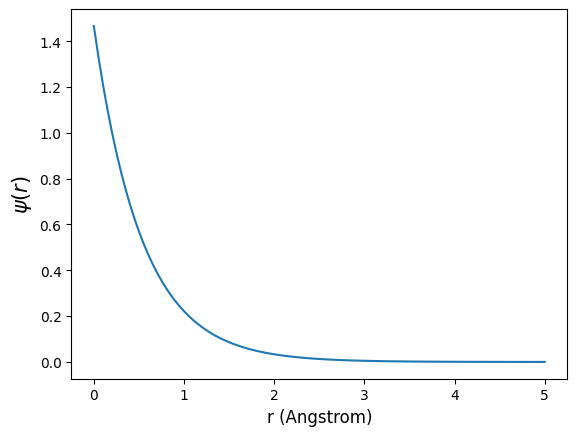

1s STO


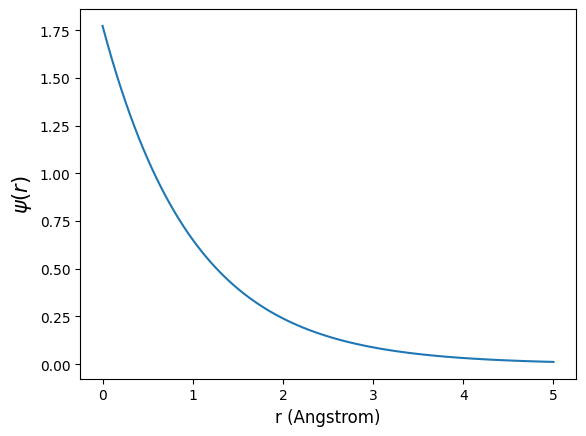

2s Spherical Harmonic Orbital


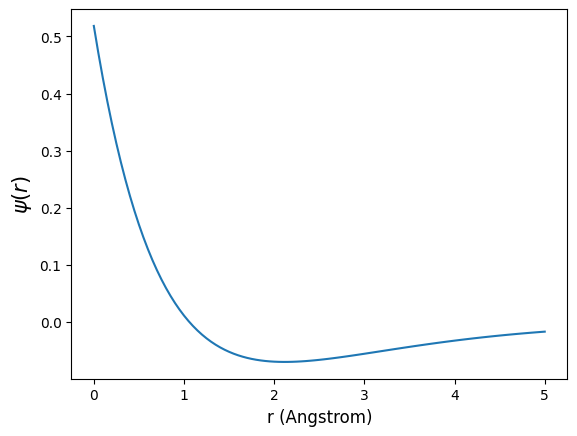

2s STO


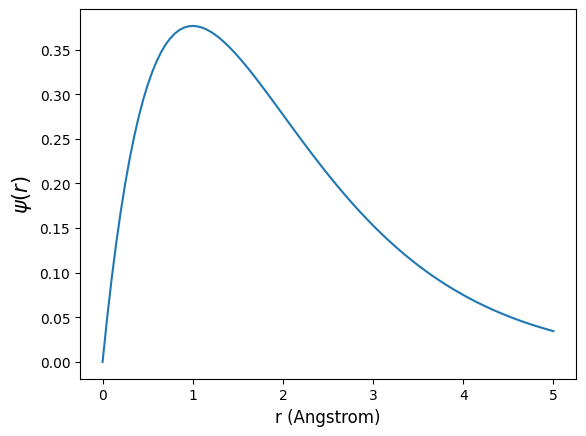

In [2]:
#1s 
orbital = Basis('1s', Z=1, verbose=1, rmax=5, r_inc=0.05, p_thresh=0.1, plot_type='Radial', orbital_type='Spherical Harmonics')
print('1s Spherical Harmonic Orbital')
orbital.fit(0, plot_ind=True)
print('1s STO')
orbital = Basis('1s', Z=1, verbose=1, rmax=5, r_inc=0.05, p_thresh=0.1, plot_type='Radial', orbital_type='STO')
orbital.fit(0, plot_ind=True)
#2s
orbital = Basis('2s', Z=1, verbose=1, rmax=5, r_inc=0.05, p_thresh=0.1, plot_type='Radial', orbital_type='Spherical Harmonics')
print('2s Spherical Harmonic Orbital')
orbital.fit(0, plot_ind=True)
print('2s STO')
orbital = Basis('2s', Z=1, verbose=1, rmax=5, r_inc=0.05, p_thresh=0.1, plot_type='Radial', orbital_type='STO')
orbital.fit(0, plot_ind=True)



3. Ok Great! So STO's don't have radial nodes (kind of interesting). 

Well let's start to do some GTO fitting. Consider the 1s orbital. Fit the 1s STO orbital with STO-1g, STO-2g, STO-3g.

STO-1G Fit


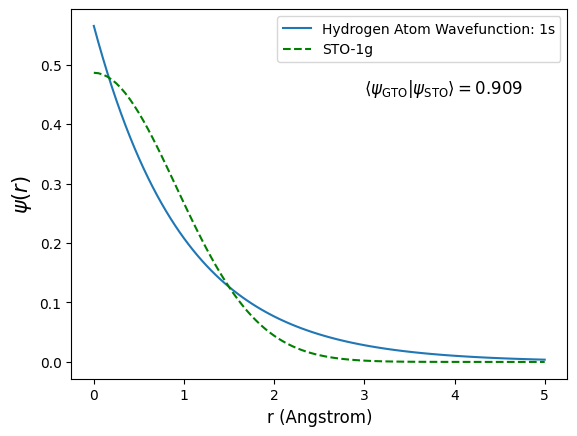

STO-2G Fit


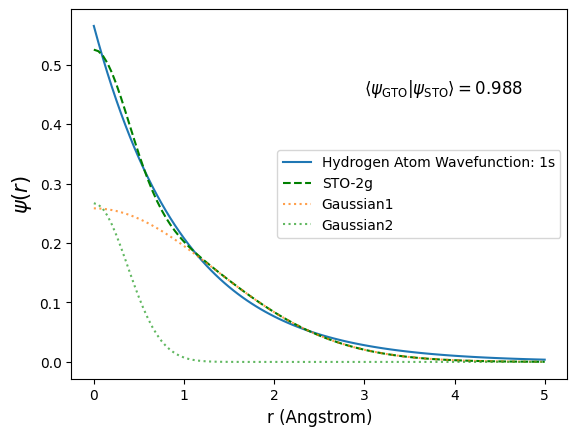

STO-3G Fit


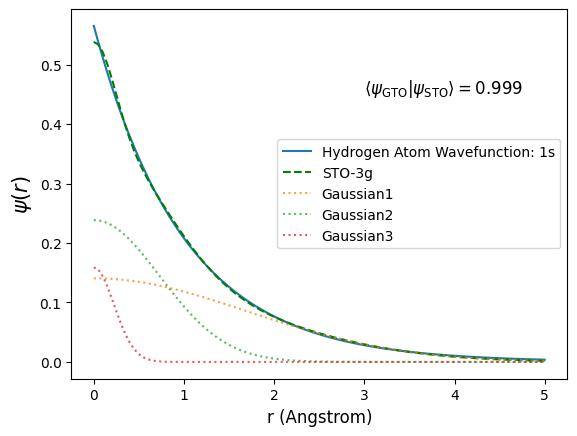

In [3]:
import matplotlib.pyplot as plt
orbital = Basis('1s', Z=1, verbose=1, rmax=5, r_inc=0.05, p_thresh=0.1, plot_type='Radial', orbital_type='STO')
print('STO-1G Fit')
orbital.fit(1, plot_ind=False)
print('STO-2G Fit')
orbital.fit(2, plot_ind=True)
print('STO-3G Fit')
orbital.fit(3, plot_ind=True)

Notice how the fit dramatically improves going from 1g to 3g approximation. Let's look at the corresponding 1e potential and kinetic energies!

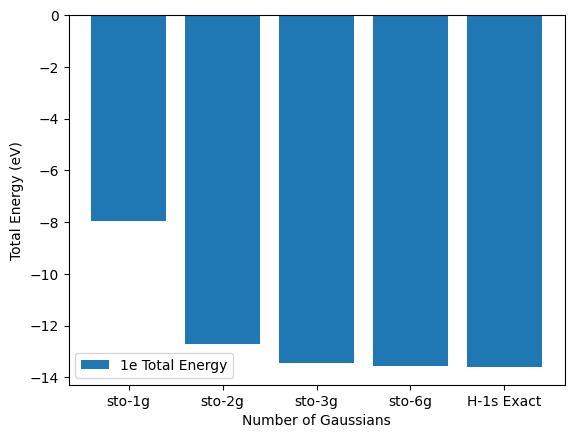

In [4]:
import matplotlib.pyplot as plt
E = []
KE = []
PE = []
Z = 1
x = ['sto-1g','sto-2g','sto-3g', 'sto-6g','H-1s Exact']
exp = {'1s':-13.605693, '2s':-3.4, '3s':-1.51, '4s':-0.85}
orb = '1s'
orbital = Basis(orb, Z=1, verbose=1, rmax=7, r_inc=0.001, p_thresh=0.1, plot_type='None', orbital_type='STO')
for i in [1,2,3,6]:
    orbital.fit(number_of_gaussians=i, plot_ind=False)
    E.append(orbital.E*27.2114)
    PE.append(orbital.PE*27.2114)
    KE.append(orbital.KE*27.2114)

E.append(exp[orb]*(Z**(2)))
plt.xlabel('Number of Gaussians')
plt.ylabel('Total Energy (eV)')
plt.bar(x, E, label='1e Total Energy')
plt.legend()


4. Let's Change the Nuclear Charge for 1s! Notice the trend? (may take a bit of time to run)

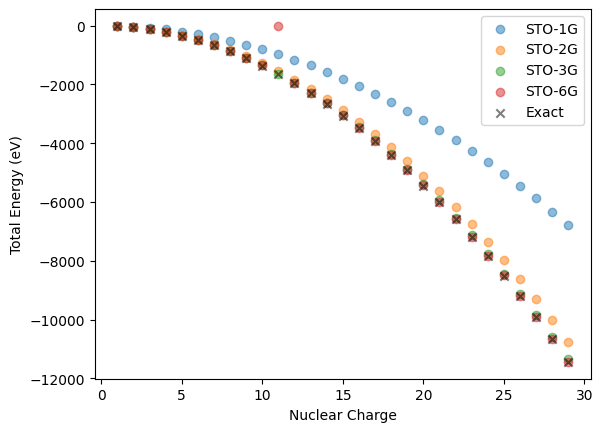

In [5]:
E1 = []
E2 = []
E3 = []
E6 = []
E_exp = []
x = []
exp = {'1s':-13.605693, '2s':-3.4, '3s':-1.51, '4s':-0.85}
orb = '1s'
for Z in range(1,30):
    for i in [1,2,3,6]:
        orbital = Basis(orb, Z=Z, verbose=1, rmax=5, r_inc=0.001, p_thresh=0.1, plot_type='None', orbital_type='STO')
        orbital.fit(number_of_gaussians=i, plot_ind=False, opt='psi')
        if i == 1:
            E1.append(orbital.E*27.2114)
        elif i == 2:
            E2.append(orbital.E*27.2114)
        elif i == 3:
            E3.append(orbital.E*27.2114)
        elif i == 6:
            E6.append(orbital.E*27.2114)
    x.append(Z)
    E_exp.append(exp[orb]*(Z**(2)))

plt.xlabel('Nuclear Charge')
plt.ylabel('Total Energy (eV)')
plt.scatter(x, E1, label='STO-1G', alpha=0.5)
plt.scatter(x, E2, label='STO-2G', alpha=0.5)
plt.scatter(x, E3, label='STO-3G', alpha=0.5)
plt.scatter(x, E6, label='STO-6G', alpha=0.5)
plt.scatter(x, E_exp, label='Exact', color='black', alpha=0.5, marker='x')
plt.legend()

## Using the Two Center Code to Generate Graphical Two Center Wavefunctions

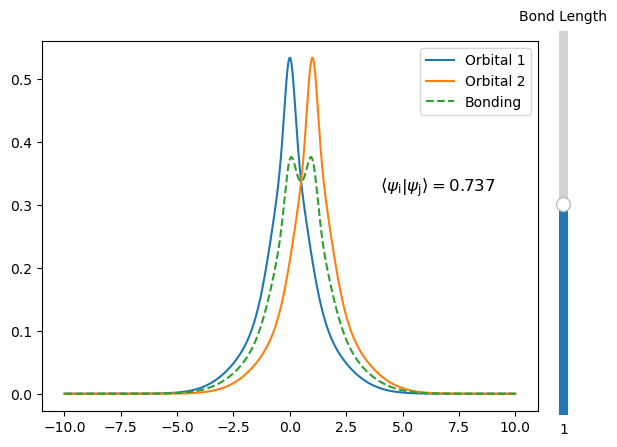

In [5]:
from two_center import TwoCenter
#Initialize TwoCenter Object
#TwoCenter(oribtal1, orbital2, pos1, pos2, charge1, charge2, bonding/antibonding)
test = TwoCenter('1s', '1s', x1=0, x2=1, Z1=1, Z2=1, bond_type='Bonding')
#Fit an STO-nG Basis Set over a set Radial distance
test.fit(n_gaussians=3, rmax=10)
#The slider doesn't work in a jupyter note-book but if u run from regular python it does!

